In [1]:
%load_ext autoreload
%autoreload 2

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ib_insync import *
import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from optopus.ib_adapter import IBBrokerAdapter
from optopus.optopus import Optopus
from optopus.utils import to_df


%matplotlib inline

2018-09-16 17:30:18,225 — optopus — INFO — Completed configuring the logger


In [2]:
# port = 7497 TWS paper trading
util.startLoop()
opt = Optopus(IBBrokerAdapter(IB(), host='127.0.0.1', port=7497, client=7))
opt.start()

DIA 0.09326273 0.11812221
EEM 0.1853825 0.20974987
EFA 0.10196196 0.12467838
EWZ 0.57206964 0.36568516
FXI 0.21003561 0.23522846
GDX 0.25518271 0.26791407
GDXJ 0.26427881 0.28575702
GLD 0.09461207 0.11409009
IWM 0.11042308 0.13306012
KRE 0.17339725 0.169254
OIH 0.24089566 0.25827824
SLV 0.17231778 0.18770018
SPY 0.0797059 0.10627983
TLT 0.08208708 0.08921473
XBI 0.20773381 0.23375213
XLB 0.13001222 0.15858633
XLE 0.15779261 0.1805249
XLF 0.13480632 0.1556178
XLI 0.11921755 0.1434103
XLK 0.13526668 0.1516968
XLP 0.10264457 0.11213752
XLU 0.12244008 0.12486888
XME 0.20968637 0.23843511
XOP 0.25500809 0.27597832
XRT 0.16499963 0.20159038
2018-09-16 17:31:31,162 — optopus.optopus — INFO — System started


INFO:optopus.optopus:System started


In [3]:
df = to_df(opt.assets())

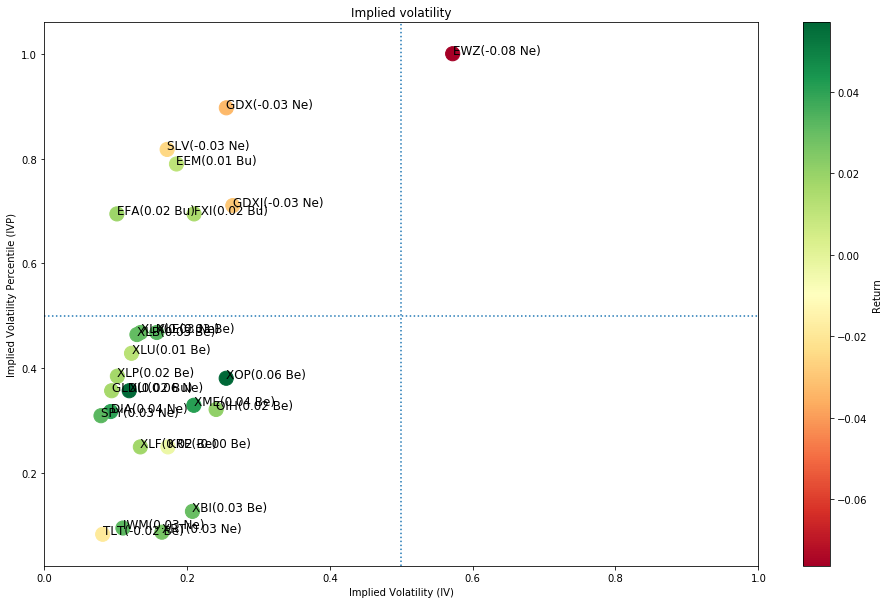

In [4]:
#ax = df.plot(kind='scatter', x='IV_h', y='IV_percentile_h', c='one_month_return', colormap='RdYlGn', s=200, figsize=(14,8))
plt.figure(figsize=(16, 10))
sc = plt.scatter(x=df['IV'].values, y=df['IV_percentile'].values, c=df['price_period'].values, cmap='RdYlGn', s=200)
plt.colorbar(sc).set_label('Return')
plt.title('Implied volatility')
plt.xlabel('Implied Volatility (IV)')
plt.ylabel('Implied Volatility Percentile (IVP)')
plt.xlim(0, 1)
plt.axvline(0.5, linestyle='dotted')
plt.axhline(0.5, linestyle='dotted')
for i, row in df.iterrows():
    label = row['code'] + '({0:.2f} {1})'.format(row['price_period'], row['directional_assumption'][0:2])
    plt.annotate(label, (row['IV'], row['IV_percentile']), fontsize=12, color='black')

In [5]:
df[['code', 'correlation']].sort_values(['correlation'], ascending=False).style.background_gradient(cmap='RdYlGn')

In [6]:
candidates = df[(df['IV'] > 0.4) & (df['IV_percentile'] > 0.3)]
candidates[['code', 'market_price','price_period', 'price_percentile','directional_assumption', 'IV', 'IV_period', 'IV_percentile']]

,code,market_price,price_period,price_percentile,directional_assumption,IV,IV_period,IV_percentile
3,EWZ,30.72,-0.076331,0.011905,Neutral,0.57207,0.564378,1.0
